# Exploratory Data Analysis and Supervised Machine Learning (Regression)

### Summary

#### This work is divided into several sections:
A) Import the required libraries

B) Dataset description and understanding data
* Import dataset
* Feature description
* Dataset information
* Analysis of the target (SalePrice)
* Looking for Correlations
* Feature distribution
    
C) Data Cleaning
* 1. Handling the Duplicates
* 2. Handling the Missing Values
    * Missing values research
    * Replacement of missing values and deletion of variables
    * Verification of missing values
* 3. Handling the Outliers
    * Gr Liv Area
    * Lot Area
    * Low Qual Fin SF
* 4. Feature modification
    
D) Exploratory data vizualization
* Numerical features
* Categorial features
    
E) Hypothesis testing
* Log transformation of sale price
* Central Air
* Land Slope
* MS Zoning
* Summary
    
F) Feature Engineering
* 1. Log transforming skew variables
* 2. Basic feature engineering: adding polynomial and interaction terms
    * Feature representation
    * Polynomial Features
    * Interaction terms
* 3. Feature Scaling
* 4. One-hot encoding for dummy variables
    
G) Modelisation
* 1. Train test split
* 2. Simple linear regression with GridSearchCV
* 3. Scaling numerical features
* 4. RidgeCV
* 5. LassoCV
* 6. ElasticNetCV
* 7. Result and discussion

#### Objective:
The main objective of this data analysis is to predict the price of houses based on numerous characteristics. The dataset used is the Ames housing dataset. It examines features of houses sold in Ames (a small city in the state of Iowa in the United States) during the 2006–2010 timeframe.

#### Dataset description:
The dataset is composed of 2931 rows and 81 columns. 'SalePrice' is our target or response variable and the rest of the characteristics are our predictor features. We also have a mix of numeric data types (28 int64 and 11 float64) and 43 objects. Among the numeric variables, there are continuous (ex: Lot Frontage, Lot Area) and discrete (ex: OverallQual, OverallCond, Bsmt Full Bath). Nominal (ex: BsmtQual, Foundation), ordinal (ex: PoolQC) and binary (ex: CentralAir) qualitative variables. There are also time variables such as Yr Sold.All the characteristics are detailed in the Feature description section.


#### Data Cleaning:
Regarding data cleaning, duplicates were searched for and deleted. 

27 features had missing values with a number ranging from 1 to 2917. According to the description of the data, NA is used as qualifiers for many features to mean that there is no pool or basement for example. Or NA or NaN means a missing value for python. Therefore, for these features, we will replace the NA with another qualifier such as No Pool for example to mean that the house does not have a swimming pool. Depending on the study of each variable, the missing values were replaced and some features have been removed. indeed, Regarding 'Garage Cars' and 'Garage Area', it is possible that the data does not exist because the property does not have a garage or the property has a garage but the data is truly missing. Therefore we will proceed as follows: if there is no garage then 'Garage Cars' and 'Garage Area' equal to zero.

According to the graphical visualizations, some variables presented outliers (Gr Liv Area, Lot Area, Low Qual Fin SF). For some of them, the Z-score method was used. Most outliers have been removed. Others were kept because they reflected a reality on the ground.

Some numerical features are actually really categorial features as MSSubClass and MoSold. We choose to transform them into nominal qualitative variables, as follows.

#### Data Exploratory Analysis:
After cleaning the data, a visual exploration of the numerical and categorical data was carried out using pair plot and box plot. These visualizations allowed on the one hand, the validation of data cleaning. On the other hand, they made it possible to highlight polynomial relationships between certain features such as SalePrice and Overall Qual or Year Built for example.

A correlation study was carried out on the numerical features. Disregarding the target, we see that the features are not too correlated with each other, which is a good thing. However, we note that 3 pairs of variables are strongly correlated with each other: 1st Flr SF/Total Bsmt SF, Giv Liv Area/TotsRms AbvGr and Garage Area/Garage cars.

We will study the relationships between the qualitative features and the target using box plot, in order to carry out some hypothesis testing. The results of these tests showed significant differences between certain categories of characteristics and average house prices, such as MS Zoning and Central Air for example.

#### Feature Engineering:
It was also studied the representation of the different modalities of the features. As a result, the 'Neighborhoods' variable has been modified for better representativeness of its modalities.

In some characteristics like 'Overall Qual' and 'Gr Liv Qual', we noticed an upward curved relationship rather than a simple linear correspondence. Polynomial features were created for these characteristics.

In addition, interaction features have also been created for certain features such as 'Overall Qual' et 'Year Built' or 'Lot Area'.

Then, a One Hot encoding was performed on the categorical variables using Pandas one-hot encoder (get_dummies).

#### Modelisation:
The dataset was split into train set and test set, with a test size of 0.25%.

4 algorithms were tested on the dataset with a cross validation of 4 splits.

A simple linear regression was performed with GridSearchCV. Regularized linear regressions were also performed with RidgeCV, LassoCv and ElasticNetCV. For the latter 3, the numerical data was scaled using the StandardScaler transformer. The metrics studied during these modelings were the Pearson coefficient (r2) and the root mean squared error (RMSE).

For these 4 regressions, very good results were obtained with r2 of 0.924 (simple linear regression) and 0.93 for the others. However, the lowest RMSE was obtained with LassoCV for a value of 22095. The best performing model on this dataset is LassoCV with 4-split cross-validation and standardization using StandardScaler.

#### Improvement:
In order to improve the performance of these models:
* a further analysis of the functionalities could be considered, with hypothesis tests carried out on all the modalities of the categorical features for an optimized selection of the features, and with the establishment of other interactions of the features.
* The more in-depth study of the hyper-parameters could also contribute to the improvement of the model.

# A) Import the required libraries

In [1]:
# Managing data
import pandas as pd

# Mathematical operations
import numpy as np

# For visualizing data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For statistical analysis
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# For splitting data
from sklearn.model_selection import train_test_split, KFold

# For scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# For modelisation
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# B) Dataset description and understanding data

The Ames housing dataset examines features of houses sold in Ames (a small city in the state of Iowa in the United States) during the 2006–2010 timeframe.

### Import dataset

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv", sep='\t')
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [3]:
data.tail(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


### Feature description

In [4]:
data_description = pd.read_csv('data_description.txt', sep="_")
data_description
for k in data_description['MSSubClass: Identifies the type of dwelling involved in the sale.\t']:
    print(k)

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
MSZoning: Identifies the general zoning classification of the sale.
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
LotFrontage: Linear feet of street connected

### Dataset information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

* According to the output above, we have 2931 entries, from 0 to 2930, along with 81 features.
* We notice that there are missing values for some features.
* 'SalePrice' is our target or response variable and the rest of the characteristics are our predictor variables.
* We also have a mix of numeric data types (28 int64 and 11 float64) and 43 objects.
* Among the numeric variables, there are continuous (ex: Lot Frontage, Lot Area) and discrete (ex: OverallQual, OverallCond, Bsmt Full Bath). Nominal (ex: BsmtQual, Foundation), ordinal (ex: PoolQC) and binary (ex: CentralAir) qualitative variables. There are also time variables such as Yr Sold.

### Analysis og response variable

In [6]:
data['SalePrice'].describe().T

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a large difference between the minimum value and the 25th percentile. It is greater than the 75th percentile and the maximum value. This means that our data may not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section.

### Looking for Correlations

Before proceeding with data cleaning, it is useful to establish a correlation between the target variable (SalePrice) and other predictor variables, since some of them might not have a major impact in determining the price of the house and not to be used in the analysis. There are many ways to discover the correlation between the target variable and the rest of the characteristics. Pair plots, scatter plots, heat maps and correlation matrices are the most common. Below, we'll use the corr() function to list the top features based on Pearson's correlation coefficient (a measure of how closely two number sequences are correlated). Correlation coefficient can only be calculated on numeric attributes (float and integer), therefore only numeric attributes will be selected.

We will select correlations greater than 0.5.

In [7]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num_corr = data_num.corr()['SalePrice'][:-1]
best_num_corr = data_num_corr[abs(data_num_corr)>0.5].sort_values(ascending=False)
print(f'The {len(best_num_corr)} most highly correlated variables with SalePrice:')
best_num_corr

The 11 most highly correlated variables with SalePrice:


Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64

Next, let's generate a few per plot to visually inspect the correlation between some of these features and the target variable. We will use the seaborns sns.pairplot() function for this analysis. Also, constructing pair plots is one of the possible ways to spot outliers that might be present in the data.

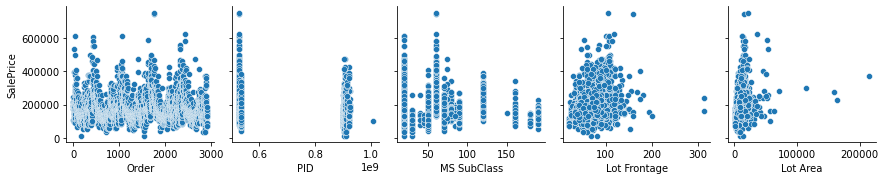

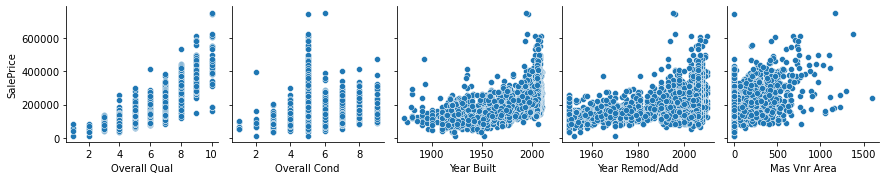

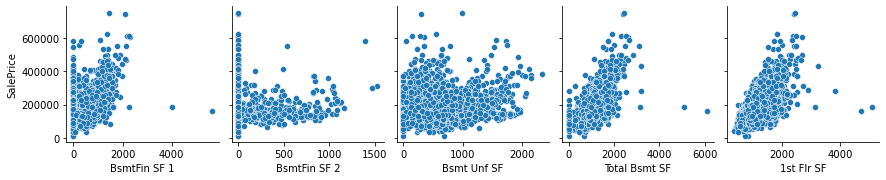

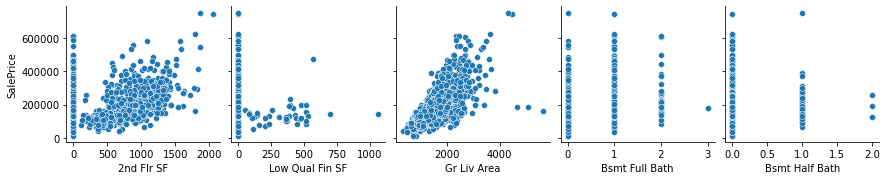

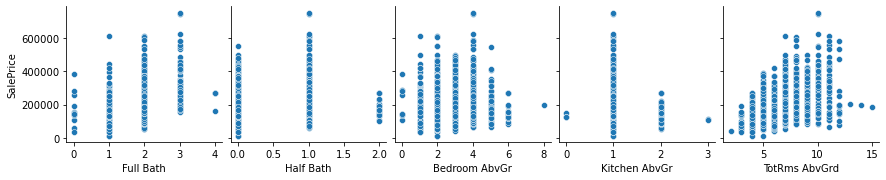

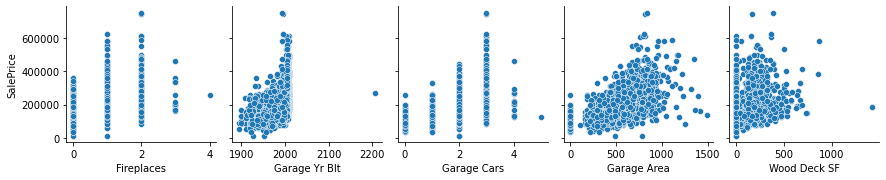

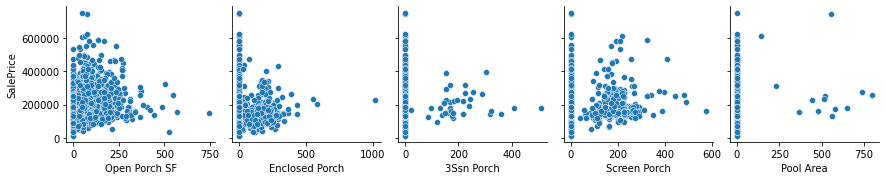

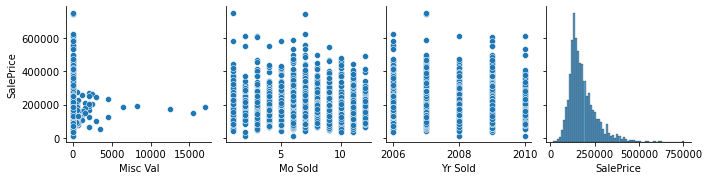

In [8]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data = data_num, x_vars = data_num.columns[i:i+5], y_vars = ['SalePrice'])

Visually, we notice that Overall Qual, Gr Liv Area, Garage Cars, Garage Area and more features are correlated to the target 'SalePrice'. We also see that there are possibly outliers for some features like Lot Area, 1st Flr SF and Gr Liv Area.

The heat maps method also makes it possible to check whether certain features are not correlated with each other, which could bias the model.

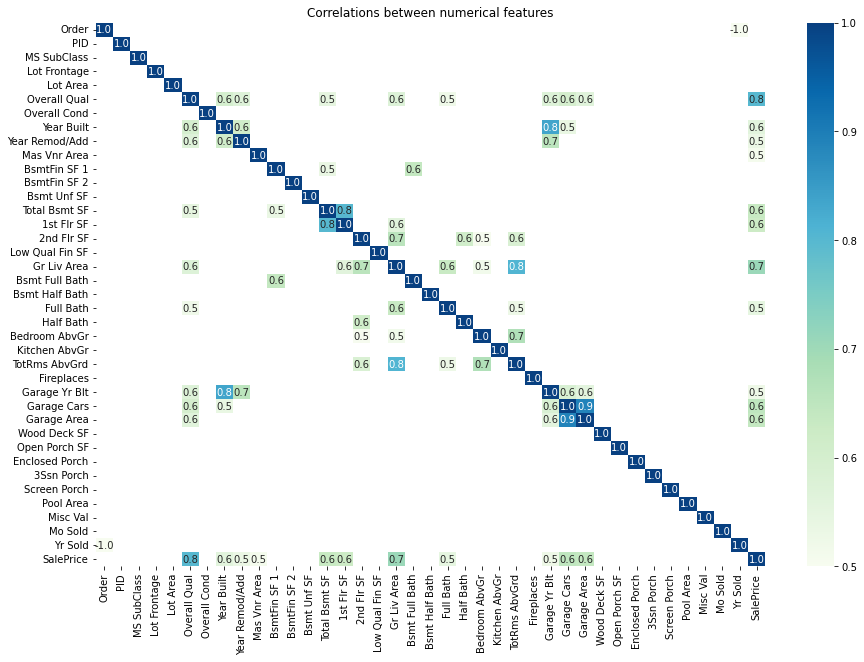

In [9]:
data_num_corr = data_num.corr()
heatmap_num_corr = data_num_corr[abs(data_num_corr)>=0.5]
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlations between numerical features')

It can be seen that some features are strongly correlated with each other, such as Garage Yr Blt and Year Built or Gr Liv Area and TotRms AbvGrd for example. A features selection will certainly be required for modeling.

### Feature distribution

The normal distribution assumption must be satisfied in order to perform any type of regression analysis. There are several ways to verify this assumption. Here, we can simply use the skew() function to calculate our level of feature skewness. We consider that the distribution is not normally distributed if the level of asymmetry is less than 0.5 or greater than 0.5.

In [10]:
for i in data_num.columns:
    if (data[i].skew() < -0.5 or data[i].skew() > 0.5):
        print(f'Skewness for {i}: {data[i].skew()}')

Skewness for MS SubClass: 1.3579444255012858
Skewness for Lot Frontage: 1.4987745667871724
Skewness for Lot Area: 12.778040640965061
Skewness for Overall Cond: 0.5749264559629781
Skewness for Year Built: -0.6041550817882403
Skewness for Mas Vnr Area: 2.6073702204244156
Skewness for BsmtFin SF 1: 1.4158746240905902
Skewness for BsmtFin SF 2: 4.140793742804169
Skewness for Bsmt Unf SF: 0.9234449946334007
Skewness for Total Bsmt SF: 1.1563330901082214
Skewness for 1st Flr SF: 1.467869250067155
Skewness for 2nd Flr SF: 0.8669705520684831
Skewness for Low Qual Fin SF: 12.120267034881609
Skewness for Gr Liv Area: 1.273957871771539
Skewness for Bsmt Full Bath: 0.615697638287629
Skewness for Bsmt Half Bath: 3.941592438497531
Skewness for Half Bath: 0.6982547390083218
Skewness for Kitchen AbvGr: 4.314674320298005
Skewness for TotRms AbvGrd: 0.75327505916172
Skewness for Fireplaces: 0.7388070196848527
Skewness for Wood Deck SF: 1.841517608437007
Skewness for Open Porch SF: 2.5355422026364764
Ske

Most of the numerical features do not satisfy the assumption of a normal distribution. Therefore, a log transformation will need to be applied.

# C) Data Cleaning

## 1. Handling the Duplicates

Duplicate values can affect analysis, so it's good to check if there are duplicates in our data. We will use the pandas duplicated() function and search by the 'PID' column, which contains a unique index number for each entry.

In [11]:
# Let's check that there are duplicates for the PID variable
data.PID.is_unique

False

There is indeed one or more duplicate(s) for the PID variable.

In [12]:
# Search for duplicates
duplicate = data[data.duplicated(['PID'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


There is a duplicate for this variable.

In [13]:
# Remove duplicate and verification
data = data.drop_duplicates(subset=['PID'])
data.PID.is_unique

True

## 2. Handling the Missing Values

### Missing values research

Missing data can significantly bias modeling. We create a function to determine the percentage of missing values according to the different predictive variables.

In [14]:
def missing_data(data):
    missing_data_count = data.isna().sum()
    missing_data_percent = data.isna().sum() / len(data) * 100

    missing_data = pd.DataFrame({
        'Number_NaN': missing_data_count,
        '%_NaN': missing_data_percent
        })
    missing_data = missing_data[missing_data.Number_NaN > 0]
    missing_data.sort_values(by='Number_NaN', ascending=False, inplace=True)

    print(f"There are {missing_data.shape[0]} features with missing values.\n")
    return missing_data

In [15]:
missing_data(data)

There are 27 features with missing values.



,Number_NaN,%_NaN
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Fireplace Qu,1422,48.532423
Lot Frontage,490,16.723549
Garage Cond,159,5.426621
Garage Qual,159,5.426621
Garage Finish,159,5.426621
Garage Yr Blt,159,5.426621


Text(0.5, 1.0, 'Missing values')

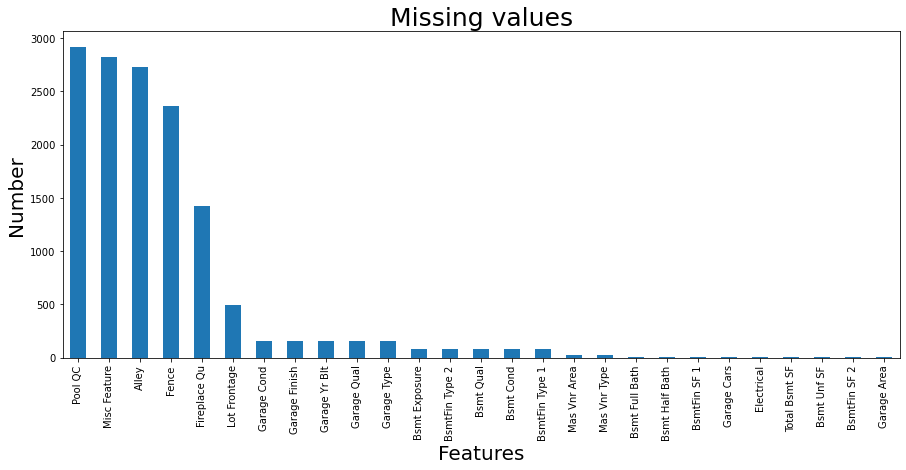

In [16]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values.head(27)
missing_values.plot(kind='bar', figsize=(15,6), fontsize=10)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.title('Missing values', fontsize=25)

### Replacement of missing values and deletion of variables

According to the description of the data, NA is used as qualifiers for many features to mean that there is no pool or basement for example. Or NA or NaN means a missing value for python. Therefore, for these features, we will replace the NA with another qualifier such as No Pool for example to mean that the house does not have a swimming pool.

In [17]:
data['Pool QC'] = data['Pool QC'].replace(np.nan, 'No Pool')
data['Misc Feature'] = data['Misc Feature'].replace(np.nan, 'None')
data['Alley'] = data['Alley'].replace(np.nan, 'No Alley')
data['Fence'] = data['Fence'].replace(np.nan, 'No Fence')
data['Fireplace Qu'] = data['Fireplace Qu'].replace(np.nan, 'No Fireplace')
data['Garage Cond'] = data['Garage Cond'].replace(np.nan, 'No Garage')
data['Garage Finish'] = data['Garage Finish'].replace(np.nan, 'No Garage')
data['Garage Qual'] = data['Garage Qual'].replace(np.nan, 'No Garage')
data['Garage Type'] = data['Garage Type'].replace(np.nan, 'No Garage')
data['Bsmt Exposure'] = data['Bsmt Exposure'].replace(np.nan, 'No Basement')
data['BsmtFin Type 2'] = data['BsmtFin Type 2'].replace(np.nan, 'No Basement')
data['Bsmt Qual'] = data['Bsmt Qual'].replace(np.nan, 'No Basement')
data['Bsmt Cond'] = data['Bsmt Cond'].replace(np.nan, 'No Basement')
data['BsmtFin Type 1'] = data['BsmtFin Type 1'].replace(np.nan, 'No Basement')
data['Mas Vnr Type'] = data['Mas Vnr Type'].replace(np.nan, 'None')

In [18]:
missing_data(data)

There are 12 features with missing values.



,Number_NaN,%_NaN
Lot Frontage,490,16.723549
Garage Yr Blt,159,5.426621
Mas Vnr Area,23,0.784983
Bsmt Full Bath,2,0.068259
Bsmt Half Bath,2,0.068259
BsmtFin SF 1,1,0.034130
BsmtFin SF 2,1,0.034130
Bsmt Unf SF,1,0.034130
Total Bsmt SF,1,0.034130
Electrical,1,0.034130


Regarding 'Garage Cars' and 'Garage Area', it is possible that the data does not exist because the property does not have a garage or the property has a garage but the data is truly missing. Therefore we will proceed as follows: if there is no garage then 'Garage Cars' and 'Garage Area' equal to zero.

In [19]:
data['Garage Cars'] = np.where(data['Garage Cond']=='No Garage', 0, data['Garage Cars'])
data['Garage Area'] = np.where(data['Garage Cond']=='No Garage', 0, data['Garage Area'])

Regarding 'Garage Yr Blt', we choose to delete the entire column, because this variable is strongly correlated to x and cannot be replaced by any date.

In [20]:
data = data.drop('Garage Yr Blt', axis=1)

Similarly, if the house has no basement, we will set the following variables to zero.

In [21]:
data['Bsmt Full Bath'].unique().tolist()

[1.0, 0.0, 2.0, 3.0, nan]

In [22]:
data['BsmtFin SF 1'] = np.where(data['Bsmt Qual']=='No Basement', 0, data['BsmtFin SF 1'])
data['BsmtFin SF 2'] = np.where(data['Bsmt Qual']=='No Basement', 0, data['BsmtFin SF 2'])
data['Bsmt Unf SF'] = np.where(data['Bsmt Qual']=='No Basement', 0, data['Bsmt Unf SF'])
data['Total Bsmt SF'] = np.where(data['Bsmt Qual']=='No Basement', 0, data['Total Bsmt SF'])
data['Bsmt Full Bath'] = np.where(data['Bsmt Qual']=='No Basement', 0, data['Bsmt Full Bath'])
data['Bsmt Half Bath'] = np.where(data['Bsmt Qual']=='No Basement', 0, data['Bsmt Half Bath'])

In [23]:
# Verification
data['Bsmt Full Bath'].unique().tolist()

[1.0, 0.0, 2.0, 3.0]

Similarly, if the property does not have a type of masonry veneer, the Masonry veneer area is considered equal zero square feet.

In [24]:
data['Mas Vnr Area'] = np.where(data['Mas Vnr Type']=='None', 0, data['Mas Vnr Area'])

For electricity, we choose to replace the missing value with the most frequent value in the data, which is Standard Circuit Breakers & Romex.

In [25]:
data['Electrical'].value_counts()

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [26]:
data['Electrical'].fillna('SBrkr', inplace = True)

Regarding the Linear feet of street connected to property, we replace missing values by 0.

In [27]:
data['Lot Frontage'] = data['Lot Frontage'].fillna(0)

### Verification of missing values

In [28]:
missing_data(data)

There are 0 features with missing values.



,Number_NaN,%_NaN


We can remove the Order and PID columns which will bring nothing to our predictions.

In [29]:
data.drop(['PID', 'Order'], axis=1, inplace=True)

## 3. Handling the Outliers

According to the graphical analyzes carried out in "looking correlation" part, there are some outliers. Outliers can significantly affect our models and can be a valuable source of information, providing us with insights into specific behaviors.

### Gr Liv Area

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

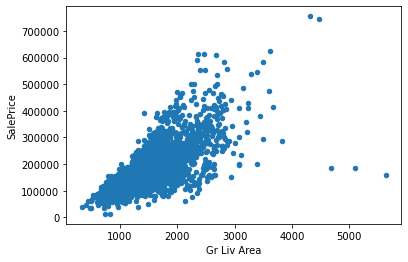

In [30]:
data.plot.scatter(x = 'Gr Liv Area', y = 'SalePrice')

There are 3 values that deviate from the trend (Gr Liv Area > 4000 and SalePrice < 300000). We will delete them.

In [31]:
GrLivArea_outlier = data[(data['Gr Liv Area'] > 4000) & (data['SalePrice'] < 300000)]
GrLivArea_outlier

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1499,60,RL,313.0,63887,Pave,No Alley,IR3,Bnk,AllPub,Corner,...,480,Gd,No Fence,None,0,1,2008,New,Partial,160000
2181,20,RL,128.0,39290,Pave,No Alley,IR1,Bnk,AllPub,Inside,...,0,No Pool,No Fence,Elev,17000,10,2007,New,Partial,183850
2182,60,RL,130.0,40094,Pave,No Alley,IR1,Bnk,AllPub,Inside,...,0,No Pool,No Fence,None,0,10,2007,New,Partial,184750


In [32]:
data = data.drop(GrLivArea_outlier.index)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

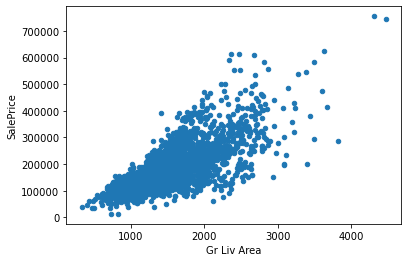

In [33]:
# Verification
data.plot.scatter(x = 'Gr Liv Area', y = 'SalePrice')

### Lot Area

<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

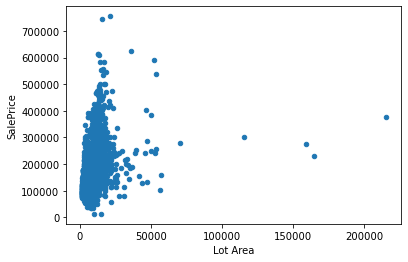

In [34]:
data.plot.scatter(x = 'Lot Area', y = 'SalePrice')

Here, we use the Z-score method.

The Z-score is the signed number of standard deviations by which the value of an observation or data point is greater than the mean value of what is observed or measured. In other words, the Z-score is the value that quantifies the relationship between a data point and a standard deviation and the mean values of a group of points. Data points too far from zero will be treated as outliers. In most cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater or less than 3 or -3 standard deviations respectively, that data point will be identified as an outlier.

In [35]:
data['LA_stats'] = stats.zscore(data['Lot Area'])
data[['Lot Area', 'LA_stats']].describe().round(2)

,Lot Area,LA_stats
count,2927.00,2927.00
mean,10109.37,0.00
std,7782.88,1.00
min,1300.00,-1.13
25%,7439.00,-0.34
50%,9430.00,-0.09
75%,11523.00,0.18
max,215245.00,26.36


The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The maximum value of 26.36 is further evidence of the presence of outliers, as it is well above the z-score limit of +3.

We choose to delete the 4 points whose Lot Area is greater than 100000.

In [36]:
LA_outlier = data.sort_values(by = 'Lot Area', ascending=False)[:4]
LA_outlier

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LA_stats
957,20,RL,150.0,215245,Pave,No Alley,IR3,Low,AllPub,Inside,...,No Pool,No Fence,None,0,6,2009,WD,Normal,375000,26.361808
1571,190,RL,0.0,164660,Grvl,No Alley,IR1,HLS,AllPub,Corner,...,No Pool,No Fence,Shed,700,8,2008,WD,Normal,228950,19.861172
2116,50,RL,0.0,159000,Pave,No Alley,IR2,Low,AllPub,CulDSac,...,No Pool,No Fence,Shed,500,6,2007,WD,Normal,277000,19.133810
2072,20,RL,0.0,115149,Pave,No Alley,IR2,Low,AllPub,CulDSac,...,No Pool,No Fence,None,0,6,2007,WD,Normal,302000,13.498555


In [37]:
data = data.drop(LA_outlier.index)

<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

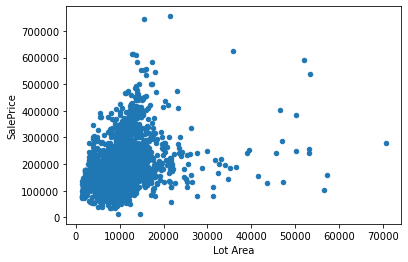

In [38]:
# Verification
data.plot.scatter(x = 'Lot Area', y = 'SalePrice')

In [39]:
data['LA_stats'] = stats.zscore(data['Lot Area'])
data[['Lot Area', 'LA_stats']].describe().round(2)

,Lot Area,LA_stats
count,2923.00,2923.00
mean,9899.45,0.00
std,5164.64,1.00
min,1300.00,-1.67
25%,7437.00,-0.48
50%,9416.00,-0.09
75%,11506.00,0.31
max,70761.00,11.79


According to the Z-score method, there are still outliers but we consider that these remaining values reflect a reality on the ground.

### Low Qual Fin SF

<AxesSubplot:xlabel='Low Qual Fin SF', ylabel='SalePrice'>

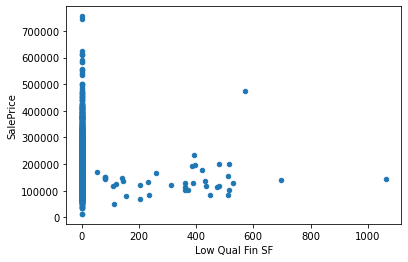

In [40]:
data.plot.scatter(x = 'Low Qual Fin SF', y = 'SalePrice')

In [41]:
data['LQFSF_Stats'] = stats.zscore(data['Low Qual Fin SF'])
data[['Low Qual Fin SF','LQFSF_Stats']].describe().round(2)

,Low Qual Fin SF,LQFSF_Stats
count,2923.00,2923.00
mean,4.69,0.00
std,46.37,1.00
min,0.00,-0.10
25%,0.00,-0.10
50%,0.00,-0.10
75%,0.00,-0.10
max,1064.00,22.85


The result shows the presence of outliers. Here, we choose to delete the last value, namely the largest.

In [42]:
LQFSF_outlier = data.sort_values(by = 'Low Qual Fin SF', ascending=False)[:1]
LQFSF_outlier

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LA_stats,LQFSF_Stats
661,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,No Fence,None,0,6,2009,WD,Normal,142900,0.098872,22.850955


In [43]:
data = data.drop(LQFSF_outlier.index)

<AxesSubplot:xlabel='Low Qual Fin SF', ylabel='SalePrice'>

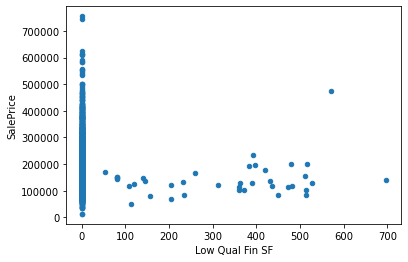

In [44]:
# Verification
data.plot.scatter(x = 'Low Qual Fin SF', y = 'SalePrice')

We delete the 2 variables that were used to study the Z-score.

In [45]:
data.drop(['LQFSF_Stats', 'LA_stats'], axis=1, inplace=True)

## 4. Feature modification

Some numerical features are actually really categorial features as MSSubClass and MoSold. We choose to transform them into nominal qualitative variables, as follows.

In [46]:
data = data.replace({"MS SubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "Mo Sold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

# D) Exploratory data vizualization

### Numerical features

After cleaning the data, we proceed again to a graphical study and correlation analysis of the different numerical features. This allows the verification of the removal of outliers and the search for a link between the predictive features and the target.

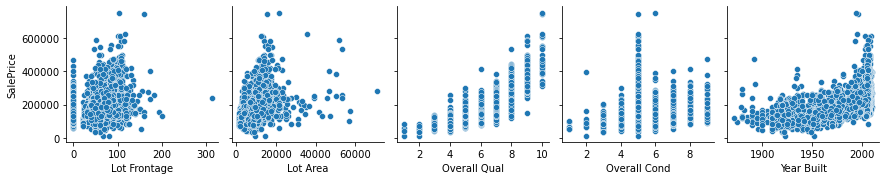

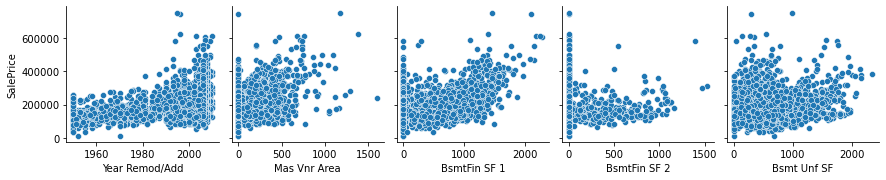

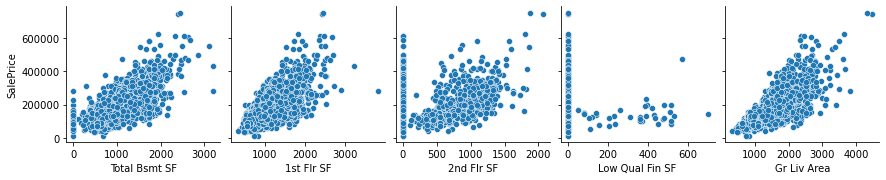

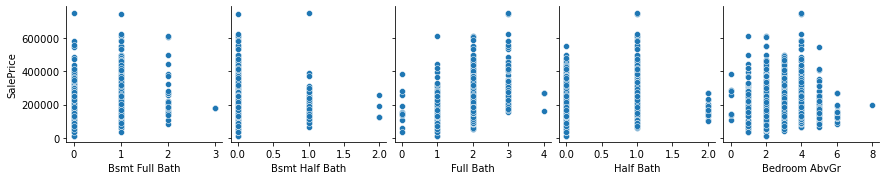

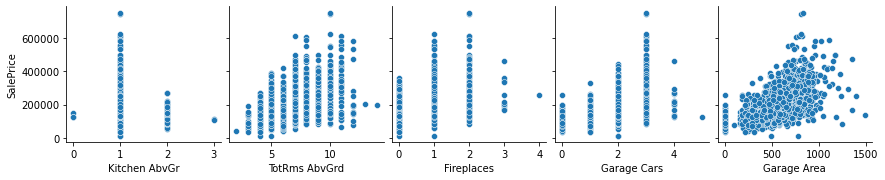

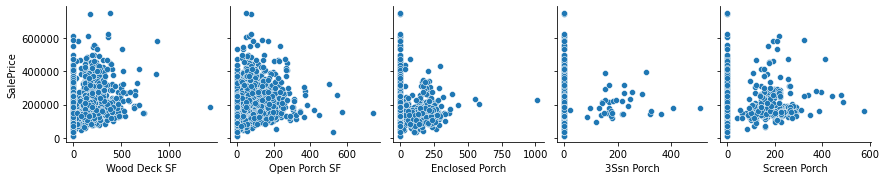

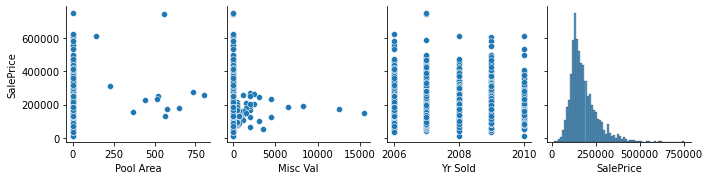

In [47]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data = data_num, x_vars = data_num.columns[i:i+5], y_vars = ['SalePrice'])

If we look at the correlations between the target and the other selected variables, we notice a polynomial relationship between SalePrice and Overall Qual or Year Built for example. We will proceed to the creation of polynomials later.

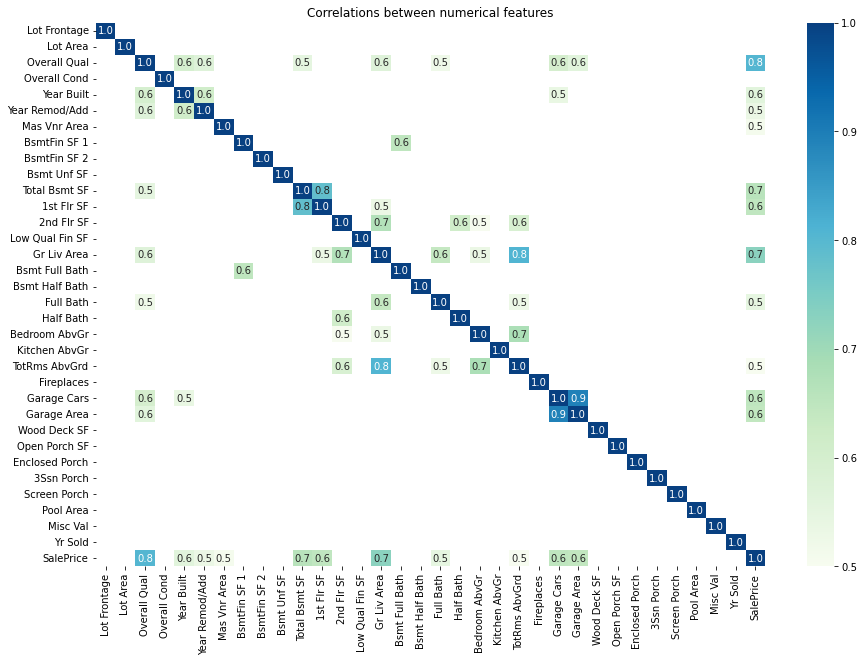

In [48]:
data_num_corr = data_num.corr()
heatmap_num_corr = data_num_corr[abs(data_num_corr)>=0.5]
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlations between numerical features')

Disregarding the target, we see that the variables are not too correlated with each other, which is a good thing. However, we note that 3 pairs of variables are strongly correlated with each other: 1st Flr SF/Total Bsmt SF, Giv Liv Area/TotsRms AbvGr and Garage Area/Garage cars.

### Categorial features

We will study the relationships between the qualitative features and the target using box plot.

In [49]:
data_cat = data.select_dtypes(include = ['object'])
print(f'Thera are {len(data_cat.columns)} features object type')
print(data_cat.columns)

Thera are 45 features object type
Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Mo Sold', 'Sale Type', 'Sale Condition'],
      dtype='object')


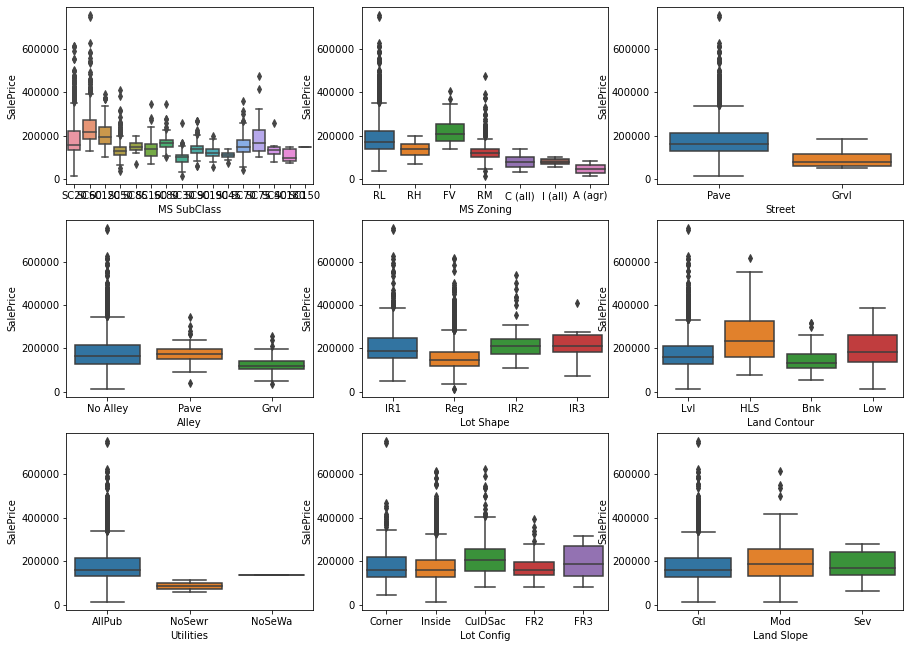

In [50]:
fig = plt.figure(figsize=(15,15))
y="SalePrice"
plt.subplot(431)
ax1 = sns.boxplot(x="MS SubClass", y=y, data=data)
plt.subplot(432)
ax2 = sns.boxplot(x="MS Zoning", y=y, data=data)
plt.subplot(433)
ax3 = sns.boxplot(x="Street", y=y, data=data)
plt.subplot(434)
ax4 = sns.boxplot(x="Alley", y=y, data=data)
plt.subplot(435)
ax5 = sns.boxplot(x="Lot Shape", y=y, data=data)
plt.subplot(436)
ax6 = sns.boxplot(x="Land Contour", y=y, data=data)
plt.subplot(437)
ax7 = sns.boxplot(x="Utilities", y=y, data=data)
plt.subplot(438)
ax8 = sns.boxplot(x="Lot Config", y=y, data=data)
plt.subplot(439)
ax9 = sns.boxplot(x="Land Slope", y=y, data=data)
plt.show()

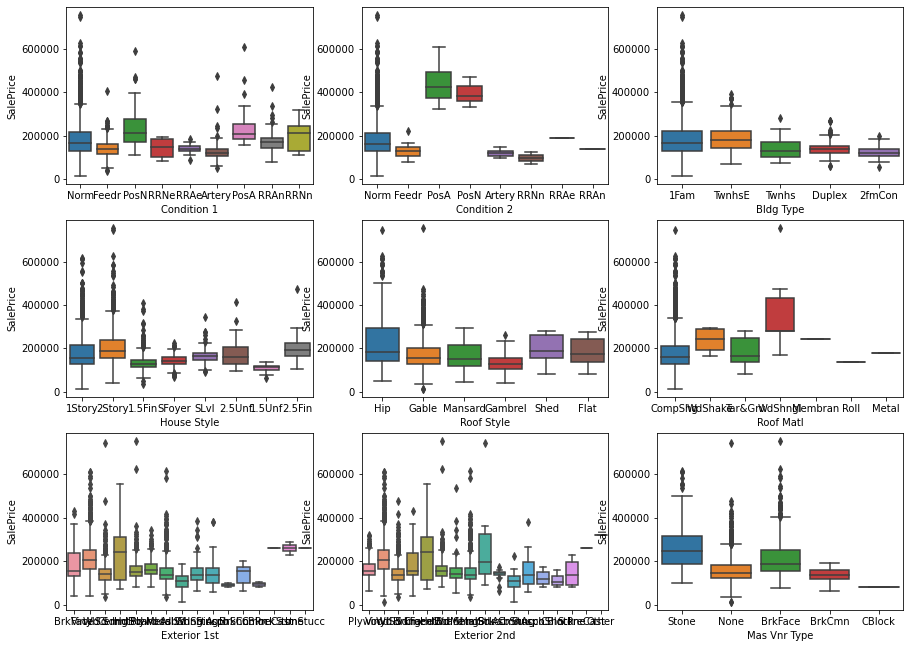

In [51]:
fig = plt.figure(figsize=(15,15))
y="SalePrice"
plt.subplot(431)
ax1 = sns.boxplot(x="Condition 1", y=y, data=data)
plt.subplot(432)
ax2 = sns.boxplot(x="Condition 2", y=y, data=data)
plt.subplot(433)
ax3 = sns.boxplot(x="Bldg Type", y=y, data=data)
plt.subplot(434)
ax4 = sns.boxplot(x="House Style", y=y, data=data)
plt.subplot(435)
ax5 = sns.boxplot(x="Roof Style", y=y, data=data)
plt.subplot(436)
ax6 = sns.boxplot(x="Roof Matl", y=y, data=data)
plt.subplot(437)
ax7 = sns.boxplot(x="Exterior 1st", y=y, data=data)
plt.subplot(438)
ax8 = sns.boxplot(x="Exterior 2nd", y=y, data=data)
plt.subplot(439)
ax9 = sns.boxplot(x="Mas Vnr Type", y=y, data=data)
plt.show()

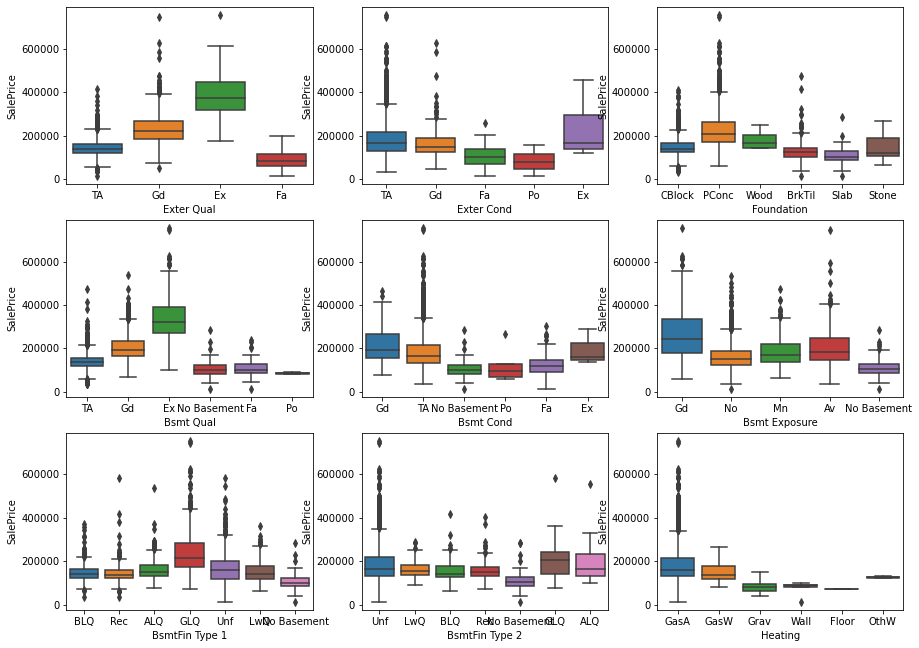

In [52]:
fig = plt.figure(figsize=(15,15))
y="SalePrice"
plt.subplot(431)
ax1 = sns.boxplot(x="Exter Qual", y=y, data=data)
plt.subplot(432)
ax2 = sns.boxplot(x="Exter Cond", y=y, data=data)
plt.subplot(433)
ax3 = sns.boxplot(x="Foundation", y=y, data=data)
plt.subplot(434)
ax4 = sns.boxplot(x="Bsmt Qual", y=y, data=data)
plt.subplot(435)
ax5 = sns.boxplot(x="Bsmt Cond", y=y, data=data)
plt.subplot(436)
ax6 = sns.boxplot(x="Bsmt Exposure", y=y, data=data)
plt.subplot(437)
ax7 = sns.boxplot(x="BsmtFin Type 1", y=y, data=data)
plt.subplot(438)
ax8 = sns.boxplot(x="BsmtFin Type 2", y=y, data=data)
plt.subplot(439)
ax9 = sns.boxplot(x="Heating", y=y, data=data)
plt.show()

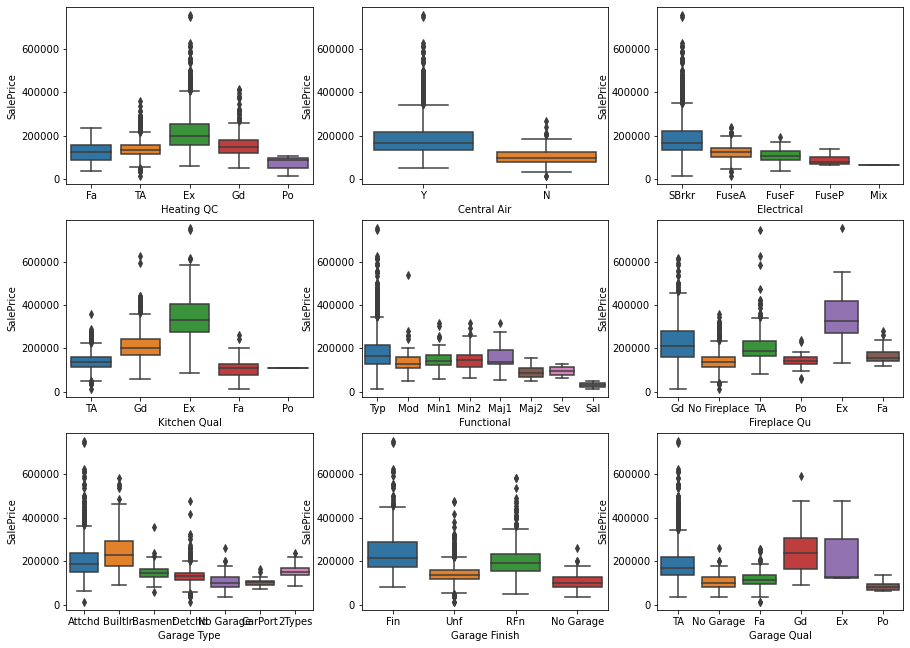

In [53]:
fig = plt.figure(figsize=(15,15))
y="SalePrice"
plt.subplot(431)
ax1 = sns.boxplot(x="Heating QC", y=y, data=data)
plt.subplot(432)
ax2 = sns.boxplot(x="Central Air", y=y, data=data)
plt.subplot(433)
ax3 = sns.boxplot(x="Electrical", y=y, data=data)
plt.subplot(434)
ax4 = sns.boxplot(x="Kitchen Qual", y=y, data=data)
plt.subplot(435)
ax5 = sns.boxplot(x="Functional", y=y, data=data)
plt.subplot(436)
ax6 = sns.boxplot(x="Fireplace Qu", y=y, data=data)
plt.subplot(437)
ax7 = sns.boxplot(x="Garage Type", y=y, data=data)
plt.subplot(438)
ax8 = sns.boxplot(x="Garage Finish", y=y, data=data)
plt.subplot(439)
ax9 = sns.boxplot(x="Garage Qual", y=y, data=data)
plt.show()

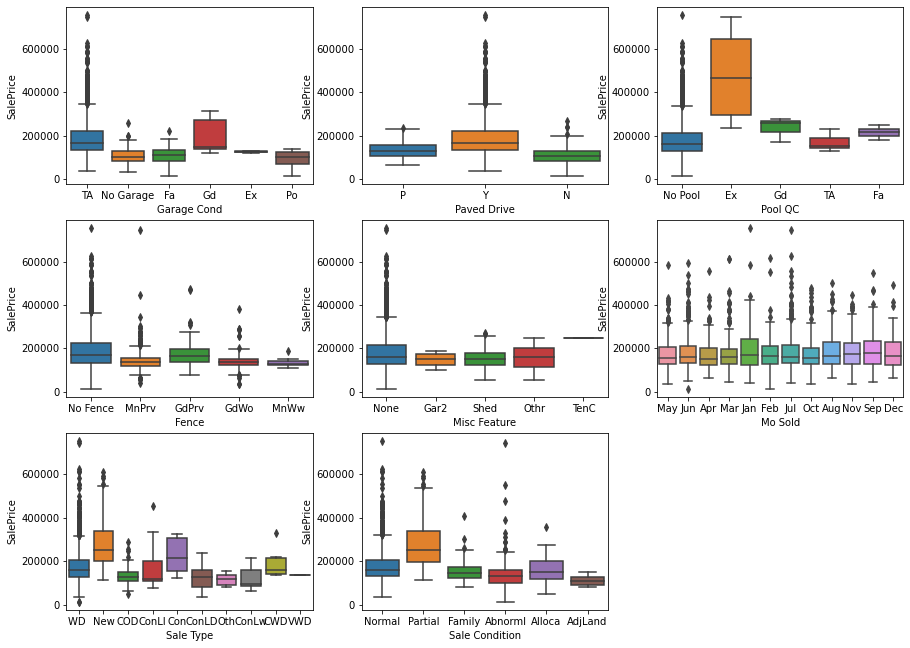

In [54]:
fig = plt.figure(figsize=(15,15))
y="SalePrice"
plt.subplot(431)
ax1 = sns.boxplot(x="Garage Cond", y=y, data=data)
plt.subplot(432)
ax2 = sns.boxplot(x="Paved Drive", y=y, data=data)
plt.subplot(433)
ax3 = sns.boxplot(x="Pool QC", y=y, data=data)
plt.subplot(434)
ax4 = sns.boxplot(x="Fence", y=y, data=data)
plt.subplot(435)
ax5 = sns.boxplot(x="Misc Feature", y=y, data=data)
plt.subplot(436)
ax6 = sns.boxplot(x="Mo Sold", y=y, data=data)
plt.subplot(437)
ax7 = sns.boxplot(x="Sale Type", y=y, data=data)
plt.subplot(438)
ax8 = sns.boxplot(x="Sale Condition", y=y, data=data)
# plt.subplot(439)
# ax9 = sns.boxplot(x="Garage Qual", y=y, data=data)
plt.show()

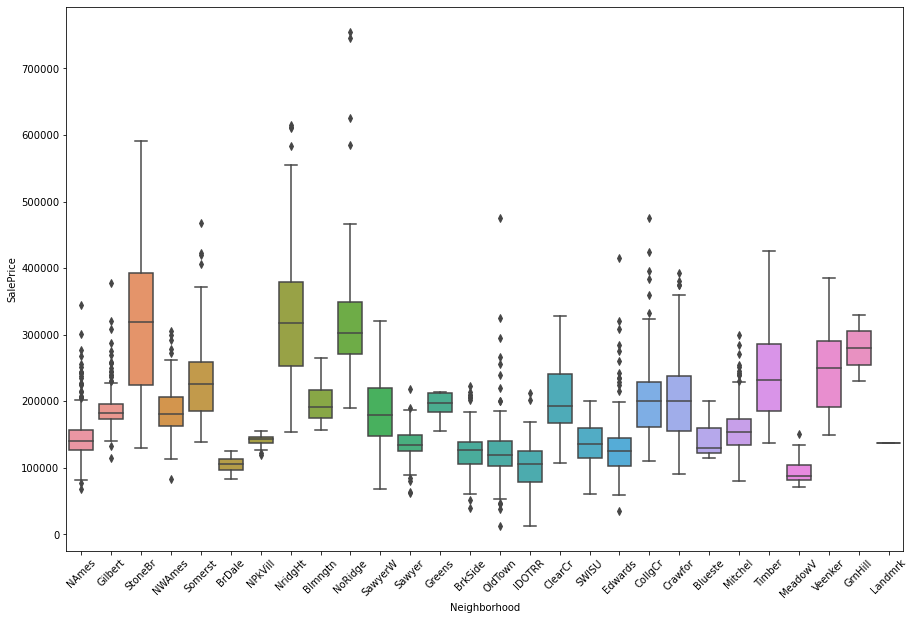

In [55]:
fig = plt.figure(figsize=(15,10))
ax10 = sns.boxplot(x="Neighborhood", y="SalePrice", data=data)
plt.setp(ax10.get_xticklabels(), rotation=45)
plt.show()

The visual study of these box plots tells us that certain categories of categorical features could show significant differences with respect to the target. As a result, we will subsequently formulate hypothesis tests for each of these categorical features.

# E) Hypothesis testing

We are going to use the hypothesis tests to show if there are significant differences in the sale prices of the houses between the different modalities of certain qualitative variables such as central air or not, or the land slope (gentle, moderate, severe) for example.

We have seen previously that a large number of features were not normally distributed. Before proceeding to the hypothesis test, we will first apply a log transformation for the sale price. Indeed, we assume that the distribution follows a normal law.

### Log transformation of sale price

C:\Users\godet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

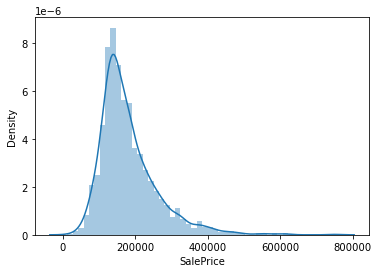

In [56]:
sns.distplot(data['SalePrice'])

In [57]:
print('Skewness: %f' % data['SalePrice'].skew())

Skewness: 1.748866


In [58]:
#Log transformation
# data['SalePrice'] = np.log(data['SalePrice'])
# sns.distplot(data['SalePrice'])
# print('Skewness: %f' % data['SalePrice'].skew())

As we can see, the logarithmic method has transformed the "SalePrice" distribution into a more symmetrical bell curve and the skewness level is now -0.01 instead of 1.74.

### Central Air

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

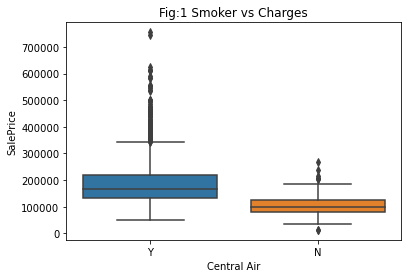

In [59]:
sns.boxplot(x=data['Central Air'], y=data.SalePrice, data=data).set(title="Fig:1 Smoker vs Charges")

We would like to prove (or disprove) that the sale price of houses with central air is more important than the sale price of houses without central air. We compare the average values (µ) of houses with or without central air.

In [60]:
central_air = data.loc[data['Central Air'] == 'Y']
central_air_price = central_air.SalePrice
cap_mean = central_air_price.mean()
cap_mean

186319.6889214967

In [61]:
no_central_air = data.loc[data['Central Air'] == 'N']
no_central_air_price = no_central_air.SalePrice
ncap_mean = no_central_air_price.mean()
ncap_mean

101890.47959183673

We define the null and alternative hypothesis:
* $ 𝐻\_{0} :\mu\_{1}<=\mu\_{2} $ The average prices of houses with central air are less than or equal to or equal to those without central air.
* $ 𝐻\_{A} :\mu\_{1}>\mu\_{2} $ The average prices of houses with central air are higher than those without central air.

The '>' sign in the alternative hypothesis indicates that the test is right-tailed. To compare the average values of the populations of smokers and non-smokers, we will use a t-test. If the z-values (calculated from a t-test) fall in the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.

Calculation of the value of t and p for the sales price of houses with and without central air:

In [62]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(central_air_price, no_central_air_price)
p_value_onetail = p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 14.82249153829442 , p_value =5.56900766468521e-48 , p_value_onetail = 2.784503832342605e-48


In [63]:
if p_value2 <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ".format (p_value_onetail,alpha) )
    print("Reject null hypothesis that average SalePrice for central air houses are less than or equal to houses without central air.")


else:
    print("Conclusion:Since p value {} is greater than alpha {} ".format (p_value_onetail,alpha))
    print("Failed to reject null hypothesis that average SalePrice for central air houses are less than or equal to houses without central air..")

Conclusion:Since p_value 2.784503832342605e-48 is less than alpha 0.05 
Reject null hypothesis that average SalePrice for central air houses are less than or equal to houses without central air.


### Land Slope

In [64]:
data.rename(columns={'Land Slope': 'Land_Slope'}, inplace=True)

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

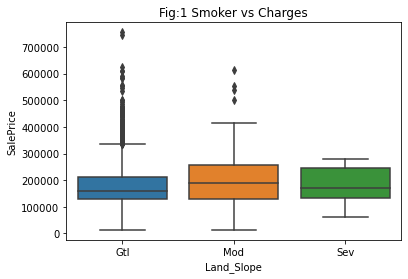

In [65]:
sns.boxplot(x=data['Land_Slope'], y=data.SalePrice, data=data).set(title="Fig:1 Smoker vs Charges")

Here, we compare the sale price of the houses with the land slope  (gentle, moderate, severe).

The null and alternative hypotheses are defined:
* $ 𝐻\_{0} :\mu\_{1}=\mu\_{2}=\mu\_{3} $ The average sale prices of houses are identical regardless of the slope of the land . \
* $ 𝐻\_{A} : $ At least one of the sale price averages is not the same.

For this example, we will use a one-way ANOVA statistic and an f-score to assess the variances of these three different populations. We will set the alpha value to 0.05.

In [66]:
data['SalePrice'].groupby([data['Land_Slope']]).mean()

Land_Slope
Gtl    179582.155476
Mod    204853.784000
Sev    177915.000000
Name: SalePrice, dtype: float64

Now we will build the ANOVA table and check for each group (gentle, moderate, severe) against the sale price values. We will use the ols (ordinary least squares) model for the estimation of the unknown parameters.

In [67]:
formula = 'SalePrice ~ C(Land_Slope)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Land_Slope),2.0,7.649325e+10,3.824663e+10,6.018394,0.002464
Residual,2919.0,1.855011e+13,6.354955e+09,NaN,NaN


The p value is 0.002464 and it is smaller than alpha(0.05). Therefore, we do not reject the null hypothesis and conclude that at least one average sale price is different depending on land slope.

### MS Zoning

In [68]:
data.rename(columns={'MS Zoning': 'MS_Zoning'}, inplace=True)

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

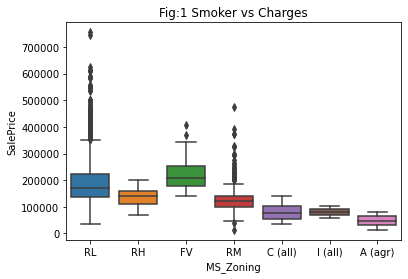

In [69]:
sns.boxplot(x=data['MS_Zoning'], y=data.SalePrice, data=data).set(title="Fig:1 Smoker vs Charges")

Here, we compare the sale price of the houses with MS Zoning  (RL, RH, FV, RM, C (all), I (all), A (agr)).

The null and alternative hypotheses are defined:
* $ 𝐻\_{0} :\mu\_{1}=\mu\_{2}=\mu\_{3}=\mu\_{4}=\mu\_{5}=\mu\_{6}=\mu\_{7} $ The average sale prices of houses are identical regardless of the MS Zoning . \
* $ 𝐻\_{A} : $ At least one of the sale price averages is not the same.

For this example, we will use a one-way ANOVA statistic and an f-score to assess the variances of these three different populations. We will set the alpha value to 0.05.

In [70]:
data['SalePrice'].groupby([data['MS_Zoning']]).mean()

MS_Zoning
A (agr)     47300.000000
C (all)     79795.040000
FV         218986.949640
I (all)     80312.500000
RH         136419.777778
RL         191140.124062
RM         126781.393939
Name: SalePrice, dtype: float64

Now we will build the ANOVA table and check for each group (gentle, moderate, severe) against the sale price values. We will use the ols (ordinary least squares) model for the estimation of the unknown parameters.

In [71]:
formula = 'SalePrice ~ C(MS_Zoning)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(MS_Zoning),6.0,2.156995e+12,3.594992e+11,63.628706,1.799378e-74
Residual,2915.0,1.646961e+13,5.649953e+09,NaN,NaN


The p value is 6.122206e-130 and it is smaller than alpha(0.05). Therefore, we reject the null hypothesis and conclude that at least one average sale price is different depending on MS Zoning.

### Summary

Hypothesis tests revealed significant differences in sales prices between houses with or without central air, and according to the general zoning classification of sale. In addition, no significant difference in sales prices was shown between houses with a gentle, moderate or severe land slope. Therefore, the 'Land Slope' feauture could be removed for the linear regression analysis. It would be interesting to perform hypothesis tests on all 45 qualitative variables.

# F) Feature Engineering

## 1. Log transforming skew variables

A log transformation was performed on the target (SalePrice) so that these data follow a normal distribution law (see hypothesis test section). Concerning the predictive features, the study of the asymmetry was carried out in section B shows that most of the numerical variables do not follow a normal distribution. Therefore, a standardization of these data will be applied later during the linear regression after the data set is divided into a train set and a test set.

## 2. Basic feature engineering: adding polynomial and interaction terms

### Feature representation

Before jumping straight to the dummy variables, it's a good idea to check the number of categories to make sure that all categories have a reasonable representation.

For this we will study the representation of the modalities of the categorical variable 'Neighborhood'.

In [72]:
nbh_counts = data.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    238
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      70
StoneBr     51
SWISU       48
ClearCr     42
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

We note that some neighborhoods are poorly represented as 'Greens', 'GrnHill' or 'Landmrk'. We are therefore going to group these neighborhoods in the same modality called 'Others'.

In [73]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)
other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [74]:
data['Neighborhood'] = data['Neighborhood'].replace(other_nbhs, 'Other')

### Polynomial Features

One of the first things we looked for in the pairplot was evidence of the relationship between each feature and the target. In some characteristics like *'Overall Qual'* and *'Gr Liv Qual'*, we notice an upward curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for these features, which allows us to express this nonlinear relationship while using linear regression as a model.

In [75]:
data['OQ2'] = data['Overall Qual'] ** 2
data['GLA2'] = data['Gr Liv Area'] ** 2

### Interaction terms

As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing *'Overall Qual'* for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies *'Overall Qual'* by *'Year Built'* can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide *'Overall Qual'* by *'Lot Area'*.

In [76]:
data['OQ_x_YB'] = data['Overall Qual'] * data['Year Built']
data['OQ_/_LA'] = data['Overall Qual'] / data['Lot Area']

## 3. Feature Scaling

A transformer such as StandarScaler() , MinMaxScaler() or RobustScaler() will be used later on the train and test set in order to scale the numerical features.

## 4. One-hot encoding for dummy variables

A significant challenge, especially when dealing with data with many columns, is ensuring that each column is correctly encoded.

This is especially true with columns of data that are ordered categories (ordinals) versus unordered categories. Unordered categories should be one-hot encoded, but this can greatly increase the number of features and create features that are highly correlated with each other, which is not necessarily the case here.

The Pandas one-hot encoder (get_dummies) works well with data defined as categorical. By default it only converts object columns. We will also delete the 1st column.

However, one-hot encoding can overfit data with much higher mean squared errors on test data than no encoding.

In [77]:
cat_cols = data.select_dtypes(include = ['object']).columns

print(f'There are {len(cat_cols.tolist())} object variables to encode')

cat_cols.tolist()

There are 45 object variables to encode


['MS SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land_Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Mo Sold',
 'Sale Type',
 'Sale Condition']

In [78]:
data[cat_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

Neighborhood      26
Exterior 2nd      17
MS SubClass       16
Exterior 1st      16
Mo Sold           12
Sale Type         10
Condition 1        9
Functional         8
Condition 2        8
House Style        8
Garage Type        7
BsmtFin Type 2     7
Roof Matl          7
BsmtFin Type 1     7
MS_Zoning          7
Fireplace Qu       6
Foundation         6
Heating            6
Garage Qual        6
Garage Cond        6
Bsmt Cond          6
Bsmt Qual          6
Sale Condition     6
Roof Style         6
Electrical         5
Misc Feature       5
Fence              5
Pool QC            5
Kitchen Qual       5
Exter Cond         5
Heating QC         5
Bldg Type          5
Mas Vnr Type       5
Bsmt Exposure      5
Lot Config         5
Exter Qual         4
Garage Finish      4
Land Contour       4
Lot Shape          4
Land_Slope         3
Utilities          3
Paved Drive        3
Alley              3
Central Air        2
Street             2
dtype: int64

In [79]:
data[cat_cols].apply(lambda x: x.nunique()).sort_values(ascending=False).sum()

306

No categorical variable has only one value. We can therefore encode them all. The 45 object columns will become 306 columns in total.

We'll use the Pandas One Hot Encoder (get_dummies), which by default only converts object columns.

In [80]:
#data.info()

In [81]:
data = pd.get_dummies(data)

In [82]:
data.shape

(2922, 344)

## Summary EDA

After all the processing provided, the dataset now has 2922 rows and 344 columns. 

* Duplicates have been removed.
* Outliers were removed. 
* Missing values have been processed.
* The distribution of variables has been studied and corrected.
* Hypothesis tests were carried out.
* New features such as polynomials have been created and others have been modified.  
* All the categorical features were encoded.

# G) Modelisation

## 1. Train test split

In [83]:
print('data shape: ', data.shape)

X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

data shape:  (2922, 344)
X_train shape:  (2191, 343)
y_train shape:  (2191,)
X_test shape:  (731, 343)
y_test shape:  (731,)


## 2. Simple linear regression with GridSearchCV

In [84]:
param_grid = {'fit_intercept': ['bool', 'True'],
             'n_jobs': np.arange(1,21)}

grid = GridSearchCV(LinearRegression(), param_grid, cv=4, scoring='r2')

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

model_lr = grid.best_estimator_

y_pred = model_lr.predict(X_test)

r2_lr = model_lr.score(X_test, y_test).round(3)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred)).round(0)
print('RMSE_Linear_Regression:',rmse_lr)
print('r2 :', r2_lr)

0.9229727482155242
{'fit_intercept': 'bool', 'n_jobs': 1}
LinearRegression(fit_intercept='bool', n_jobs=1)
RMSE_Linear_Regression: 23050.0
r2 : 0.924


In [85]:
def Plot(y_test, y_pred):
    f = plt.figure(figsize=(6,6))
    ax = plt.axes()
    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)
    ax.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (0,1))
    lim = (0, y_test.max())
    ax.set(xlabel='Actual Price', 
           ylabel='Predicted Price', 
           xlim=lim,
           ylim=lim,
           title='Predicted price VS actual price', );

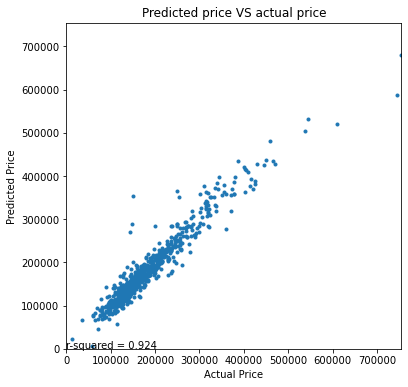

In [86]:
Plot(y_test, y_pred)

## 3. Scaling numerical features

In [87]:
scaler = StandardScaler()
num_col = X_train.select_dtypes(include = ['float64', 'int64']).columns
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

## 4. RidgeCV

In [88]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV_model = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)

y_pred = ridgeCV_model.predict(X_test)

rmse_ridgeCV = np.sqrt(mean_squared_error(y_test, y_pred)).round(0)
r2_ridge = r2_score(y_test, y_pred).round(3)

print('Alpha_best',ridgeCV_model.alpha_)
print('RMSE_RidgeCV',rmse_ridgeCV)
print('r2 :', r2_ridge)

Alpha_best 10.0
RMSE_RidgeCV 22149.0
r2 : 0.93


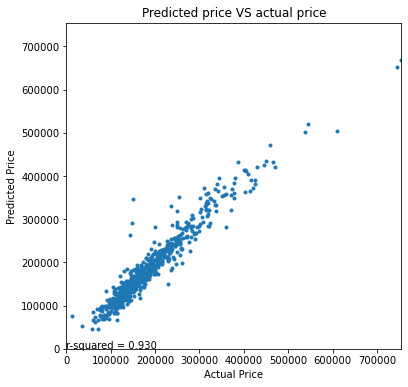

In [89]:
Plot(y_test, y_pred)

## 5. LassoCV

In [90]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.05, 0.1, 1, 5, 20, 50, 80, 100, 120, 140])

lassoCV_model = LassoCV(alphas=alphas2, max_iter=5e5, cv=4).fit(X_train, y_train)

y_pred = lassoCV_model.predict(X_test)

rmse_lassoCV = np.sqrt(mean_squared_error(y_test, y_pred)).round(0)
r2_lasso = r2_score(y_test, y_pred).round(3)

print('Alpha_best',lassoCV_model.alpha_)
print('RMSE_LassoCV',rmse_lassoCV)
print('r2 :', r2_lasso)

Alpha_best 50.0
RMSE_LassoCV 22095.0
r2 : 0.93


In [91]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV_model.coef_), 
                                                               len(lassoCV_model.coef_.nonzero()[0])))

Of 343 coefficients, 152 are non-zero with Lasso.


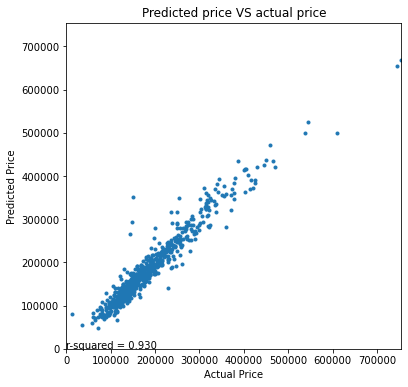

In [92]:
Plot(y_test, y_pred)

## 6. ElasticNetCV

In [93]:
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV_model = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=15e5).fit(X_train, y_train)

y_pred = elasticNetCV_model.predict(X_test)

rmse_elasticNetCV = np.sqrt(mean_squared_error(y_test, y_pred)).round(0)

r2_elasticNetCV = r2_score(y_test, y_pred).round(3)

print('Alpha_best',elasticNetCV_model.alpha_)
print('RMSE_elasticNetCV',rmse_elasticNetCV)
print('r2 :', r2_elasticNetCV)

C:\Users\godet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8033072842.5390625, tolerance: 1093400454.5755181
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\godet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2991554944.0786133, tolerance: 1079843679.0488164
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\godet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2627979628.623596, tolerance: 1118839322.64557
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\godet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633:

Alpha_best 0.05
RMSE_elasticNetCV 22150.0
r2 : 0.93


## 7. Result and discussion

In [94]:
rmse_vals = [rmse_lr, rmse_ridgeCV, rmse_lassoCV, rmse_elasticNetCV]
r2_vals = [r2_lr, r2_ridge, r2_lasso, r2_elasticNetCV]
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

df = pd.Series(rmse_vals, index=labels).to_frame()
df.rename(columns={0: 'RMSE'}, inplace=1)
df['R2'] = pd.Series(r2_vals, index=labels).to_frame()
df

,RMSE,R2
Linear,23050.0,0.924
Ridge,22149.0,0.930
Lasso,22095.0,0.930
ElasticNet,22150.0,0.930


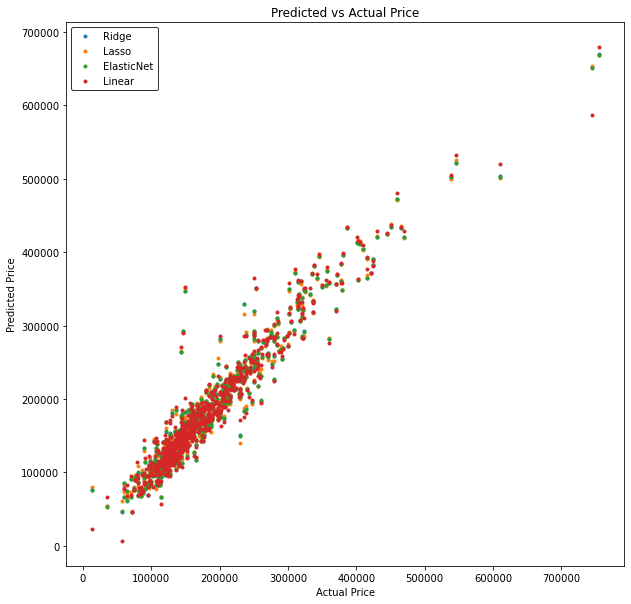

In [95]:
f = plt.figure(figsize=(10,10))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV_model, lassoCV_model, elasticNetCV_model]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)

X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
ax.plot(y_test, model_lr.predict(X_test), 
             marker='o', ls='', ms=3.0, label='Linear')

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Predicted vs Actual Price');

For these 4 regressions, very good results were obtained with r2 of 0.924 (simple linear regression) and 0.93 for the others. However, the lowest RMSE was obtained with LassoCV for a value of 22095. The best performing model on this dataset is LassoCV with 4 splits cross-validation and standardization using StandardScaler.